In [145]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
from scipy import stats

In [146]:
datos = pd.read_csv("casa_comida.csv")
datos

,ID,Tipo comida,Ingreso estimado,Frecuencia mensual,Gasto estimado,Horario
0,1,Ensalada,54.58,0.24,5.82,Noche
1,2,Vegana,656.52,0.20,273.31,Noche
2,3,Vegana,624.30,0.25,282.08,Noche
3,4,Ensalada,NaN,0.24,NaN,Día
4,5,Pizza,580.01,0.11,417.78,Noche
...,...,...,...,...,...,...
1007,996,Pizza,1724.12,0.85,1266.09,Noche
1008,997,Pasta,NaN,0.81,NaN,Noche
1009,998,Papa Frita,1674.53,0.70,1341.02,Noche
1010,999,Sushi,1587.35,0.80,1292.02,Noche


INSPECCIONAMOS Y CARACTERIZAMOS

In [147]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1012 non-null   int64  
 1   Tipo comida         1012 non-null   object 
 2   Ingreso estimado    1001 non-null   float64
 3   Frecuencia mensual  993 non-null    float64
 4   Gasto estimado      999 non-null    float64
 5   Horario             1012 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 47.6+ KB


In [148]:
datos.describe()

,ID,Ingreso estimado,Frecuencia mensual,Gasto estimado
count,1012.000000,1001.000000,993.000000,999.000000
mean,499.844862,1095.882468,0.504381,749.587728
std,289.254232,521.360376,0.255836,424.844709
min,1.000000,28.600000,-0.200000,2.820000
25%,249.750000,560.330000,0.230000,323.505000
50%,499.500000,1094.950000,0.500000,741.100000
75%,750.250000,1613.180000,0.770000,1182.750000
max,1000.000000,2379.690000,1.220000,1942.490000


<AxesSubplot:>

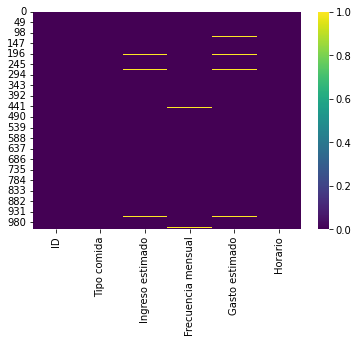

In [149]:
sns.heatmap(datos.isnull(),cmap="viridis")

Observamos que hay muy pocos datos nulos, por ende los podemos eliminar.

In [150]:
datos2 = datos.dropna()
datos2

,ID,Tipo comida,Ingreso estimado,Frecuencia mensual,Gasto estimado,Horario
0,1,Ensalada,54.58,0.24,5.82,Noche
1,2,Vegana,656.52,0.20,273.31,Noche
2,3,Vegana,624.30,0.25,282.08,Noche
4,5,Pizza,580.01,0.11,417.78,Noche
5,6,Pizza,439.10,-0.18,222.18,Noche
...,...,...,...,...,...,...
1006,995,Sushi,1620.57,0.82,1236.29,Noche
1007,996,Pizza,1724.12,0.85,1266.09,Noche
1009,998,Papa Frita,1674.53,0.70,1341.02,Noche
1010,999,Sushi,1587.35,0.80,1292.02,Noche


Ya con el dataset sin los datos nulos tenemos 980 rows,antes teniamos 1012, sacamos aprox el 10%.Es decir que los datos nulos ocupaban el 10% del dataset.

In [151]:
columnas = list(datos.columns)
columnas

['ID',
 'Tipo comida',
 'Ingreso estimado',
 'Frecuencia mensual',
 'Gasto estimado',
 'Horario']

In [152]:
del(columnas[0:2])


In [153]:
columnas

['Ingreso estimado', 'Frecuencia mensual', 'Gasto estimado', 'Horario']

In [154]:
del(columnas[3])

In [155]:
columnas

['Ingreso estimado', 'Frecuencia mensual', 'Gasto estimado']

Nos quedamos con las columnas numericas, para poder analizar los datos numericos-

Verificamos si es normal

In [156]:
def verificacion_de_medias(lista):
    test = {}
    for columna in lista:
        w, p = stats.shapiro(datos[columna].dropna())
        test[columna] = p
    return test

In [157]:
columnas

['Ingreso estimado', 'Frecuencia mensual', 'Gasto estimado']

In [158]:
verificacion_de_medias(columnas)

{'Ingreso estimado': 1.7371185774404544e-19,
 'Frecuencia mensual': 7.09651040939859e-22,
 'Gasto estimado': 1.6374471587251932e-20}

Como todos son menores a 0,05 no son normales y por ende las tenemos que normalizar.

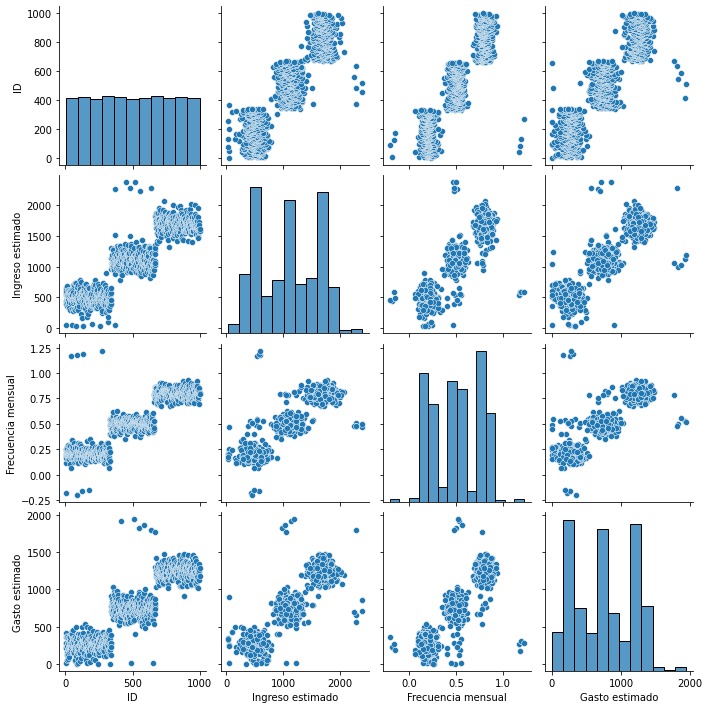

In [159]:
sns.pairplot(datos2)

Relacionamos el ingreso estimado con la frecuencia mensual, porque con esos datos podemos llegamos a brindarle una informacion apropiada a la dueña del resto para tomar decisiones respecto a la cantidad.

                                                                          ANOMALIAS
                                                                          

Los datos nulos ya los eliminamos antes.

Eliminamos los datos duplicados

In [160]:
datos3 = datos2.drop_duplicates().reset_index(drop = True)

In [161]:
datos3

,ID,Tipo comida,Ingreso estimado,Frecuencia mensual,Gasto estimado,Horario
0,1,Ensalada,54.58,0.24,5.82,Noche
1,2,Vegana,656.52,0.20,273.31,Noche
2,3,Vegana,624.30,0.25,282.08,Noche
3,5,Pizza,580.01,0.11,417.78,Noche
4,6,Pizza,439.10,-0.18,222.18,Noche
...,...,...,...,...,...,...
963,995,Sushi,1620.57,0.82,1236.29,Noche
964,996,Pizza,1724.12,0.85,1266.09,Noche
965,998,Papa Frita,1674.53,0.70,1341.02,Noche
966,999,Sushi,1587.35,0.80,1292.02,Noche


Observamos que eliminamos 12 rows por los datos duplicados.

Relacionamos el ingreso estimado con la frecuencia mensual, porque con esos datos podemos llegamos a brindarle una informacion apropiada a la dueña del resto para tomar decisiones respecto a la cantidad.

Sacamos outlayers

In [162]:
Cs1 = datos3["Ingreso estimado"].quantile(0.95)
Ci1 = datos3["Ingreso estimado"].quantile(0.05)
Cs2 = datos3["Frecuencia mensual"].quantile(0.95)
Ci2 = datos3["Frecuencia mensual"].quantile(0.05)

datos4= datos3[(datos3['Ingreso estimado'] >= Ci1) & (datos3['Ingreso estimado'] <= Cs1) & (datos3['Frecuencia mensual'] >= Ci2) & (datos3['Frecuencia mensual'] <= Cs2)]

In [163]:
datos4

,ID,Tipo comida,Ingreso estimado,Frecuencia mensual,Gasto estimado,Horario
1,2,Vegana,656.52,0.20,273.31,Noche
2,3,Vegana,624.30,0.25,282.08,Noche
5,7,Ensalada,541.80,0.18,366.88,Noche
6,8,Empanada,387.73,0.16,206.83,Día
7,9,Sandwich,543.67,0.27,375.13,Día
...,...,...,...,...,...,...
963,995,Sushi,1620.57,0.82,1236.29,Noche
964,996,Pizza,1724.12,0.85,1266.09,Noche
965,998,Papa Frita,1674.53,0.70,1341.02,Noche
966,999,Sushi,1587.35,0.80,1292.02,Noche


Achicamos el dataframe y nos quedamos con 801 rows.

<AxesSubplot:>

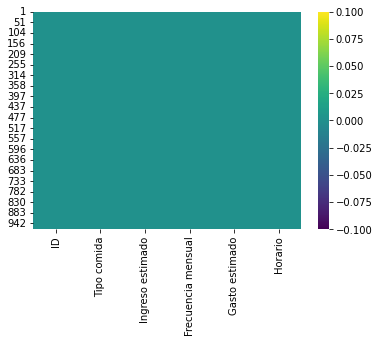

In [164]:
sns.heatmap(datos4.isnull(),cmap="viridis")

Observamos que ya no tenemos datos nulos.

Luego de limpiar y filtrar los datos, ahora normalizamos.

In [165]:
scaler = StandardScaler()
datos_escalado = scaler.fit_transform(datos4[columnas])

Una vez que normalizamos, observamos las inercias y hacemos el kmeans.

In [166]:
def inercias_por_k(datos_escalado):
  inercias = {}
  for i in range(1,11):
      kmeans = KMeans(n_clusters = i, init="random", n_init=10, max_iter=300, random_state=123457)
      kmeans.fit(datos_escalado)
      inercias[i] = kmeans.inertia_
  return inercias

In [167]:
inercias = inercias_por_k(datos_escalado)

In [168]:
inercias

{1: 2403.0,
 2: 779.101844221292,
 3: 175.9564405017448,
 4: 159.52289492941142,
 5: 143.53689594922474,
 6: 129.96778961144838,
 7: 111.83798414937407,
 8: 103.32935353955372,
 9: 92.77592225415943,
 10: 89.21485866762312}

In [169]:
datos_inercias = pd.DataFrame(inercias.items(),columns=["k","inercia"] )

<AxesSubplot:xlabel='k', ylabel='inercia'>

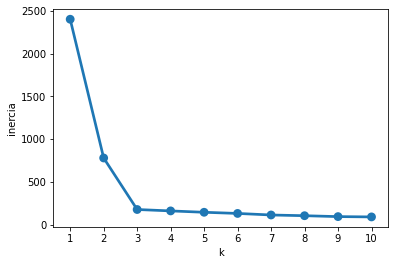

In [170]:
sns.pointplot(data =datos_inercias, x = "k", y ="inercia")

Observamos un gran cambio de pendiente en el grafico del codo en k=3

In [173]:
k = 3
#agrupar
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
kmeans.fit(datos_escalado)

KMeans(init='random', n_clusters=3, random_state=123457)

<AxesSubplot:>

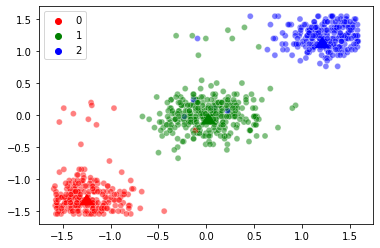

In [178]:
colores = ["red", "green","blue"]
sns.scatterplot(x = datos_escalado[:,0], y= datos_escalado[:,1], hue = kmeans.labels_, palette = colores, alpha = 0.5)
sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:, 1], zorder = 10, palette = colores, hue= [0,1,2], legend = False, marker = 6, s = 200)

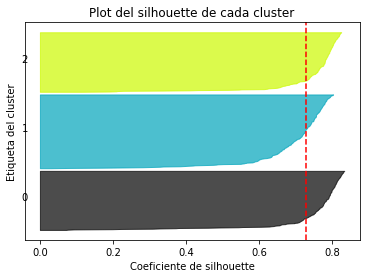

In [182]:
silhouette_avg = silhouette_score(datos_escalado, kmeans.labels_)
sample_silhouette_values = silhouette_samples(datos_escalado, kmeans.labels_)

def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])

graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

Podemos concluir que estan bien agrupados los 3 grupos ya que no hay numeros negativos, se ve un gran volumen de datos en todos grupos.
Podemos observar que entre las columnas de  ingreso estimado y  frecuencia mensual. hay tres grupos sdiferentes. 

Observamos que pasa con k =5

In [183]:
k = 5
#agrupar
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
kmeans.fit(datos_escalado)

KMeans(init='random', n_clusters=5, random_state=123457)

<AxesSubplot:>

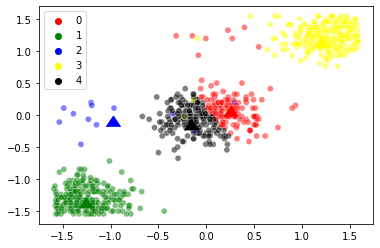

In [184]:
colores = ["red", "green","blue","yellow","black"]
sns.scatterplot(x = datos_escalado[:,0], y= datos_escalado[:,1], hue = kmeans.labels_, palette = colores, alpha = 0.5)
sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:, 1], zorder = 10, palette = colores, hue= [0,1,2,3,4], legend = False, marker = 6, s = 200)

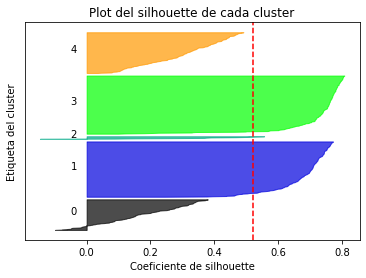

In [185]:
silhouette_avg = silhouette_score(datos_escalado, kmeans.labels_)
sample_silhouette_values = silhouette_samples(datos_escalado, kmeans.labels_)

def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])

graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

Observamos que con k = 5, no se representan bien los graficos,es decir que entre las doscolumnas seleccionadas,no lo podemos dividir en 5 grupos. Ya que en el grupo 0 hay muy escaza informacion, y dentro de esa poca que hay,hay numeros negativos,es decir que hay algunos que tendrian que estar en otro grupo. En el grupo 2 hay muy muy poca info ya que es muy finito el grafico de cilueta, y muchos negativos, que no tendrian que estar en ese grupo. el grupo 1,3 y 4 son mas ricos en informacion y no tienen nymeros negativos.

Dado la distribucion dada,la nomalia que mas peso tiene es claramente los outlayers, ya que dentro de ese grafico se observan bastantes barras por encima de la media(distribucion).Y la tenemos que eliminar pq sino vamos a tener datos que no son parametro para nuestro analisis adecuado. por ej no podemos hacer el claustering y comparar dos columnas sabiendo que hay gente que tiene ingreso de millones de dolares(no son parametro).